### Time series modelling
We have a time series with a clear trend, seasonality and jump. The researcher knows that there is jump present at $t=270$ due to a change in the data collection method. First we will load the data and plot it. After that, we will use the PSD to identify the frequency of the seasonality and the trend. 

In [8]:
# Import necessary libraries

import numpy as np
import matplotlib.pyplot as plt

# Import the data
data = np.array([11.45597157, 15.94789764, 12.30148271,  9.13358141,  2.58184562,
       10.95456964,  3.69809318, 11.44636424, 10.80544783, 12.38098492,
       11.54897375, 19.31194611, 12.12252661,  9.98599556, 11.60389914,
       10.46209933,  8.96147123,  7.11245384,  4.26347084, 10.7519177 ,
        7.81589454, 16.66295892, 18.48344424, 17.5974714 , 13.2228174 ,
       16.31125138, 12.33660561,  2.33154242,  2.93452744,  9.13964713,
        8.36681806,  8.98550456, 13.99953011, 14.12102914, 19.83967076,
       18.05770602, 16.81519874, 10.84129196,  6.11617555, 10.70419501,
        9.99589668,  6.14546554, 11.77688896, 11.10459271, 14.3101019 ,
       18.02580669, 25.48864304, 21.63665269, 14.34135119, 16.76686106,
       13.47714406, 11.94351168, 10.78873477, 10.59644265,  6.60760718,
       12.68881244, 18.96558167, 21.35281324, 22.04885378, 21.05606879,
       12.58249621, 15.33167125, 17.28303595,  4.09987902, 13.08452483,
       19.53672184, 14.65426035, 18.03419113, 22.53381169, 21.38477433,
       25.03150635, 14.36365534, 17.91128252, 23.20698379, 20.33601078,
       17.13460094, 15.92905078, 11.47332787, 15.84490286, 22.24778677,
       22.42234145, 25.46102446, 27.27332887, 22.72454444, 19.48988589,
       17.22496605, 16.82470942, 15.6172585 , 12.88341355, 10.06804755,
       19.27404251, 20.06063283, 21.26023394, 23.63604259, 23.31337453,
       16.49804107, 23.65583924, 20.63226704, 17.81420825, 20.33008935,
       12.32074957, 18.06214985, 22.12335576, 22.14170638, 25.35997315,
       24.16451389, 27.45449635, 22.1276958 , 21.1225919 , 25.75348599,
       21.3301569 , 16.00975066, 14.13981402, 16.80413373, 26.24239636,
       24.28698747, 28.1689711 , 25.07763479, 24.85185391, 25.73729435,
       25.46118482, 26.69798825, 15.52087717, 14.28426396, 14.6935964 ,
       24.01857145, 25.89839835, 20.87540699, 27.11000048, 27.70532329,
       29.75270489, 22.95154796, 17.93809626, 17.12560764, 25.4752212 ,
       21.2062299 , 20.62191849, 22.02207213, 23.14056749, 27.28265646,
       30.03630198, 30.87332825, 29.68505463, 23.18109553, 23.10760677,
       24.6859994 , 17.73793252, 21.23716515, 22.55773239, 24.68434915,
       30.5539557 , 28.20042491, 29.86457394, 29.64903893, 29.87558983,
       25.44145766, 25.15128924, 21.75098338, 22.4843817 , 19.33684734,
       23.80925989, 24.9061194 , 24.61038011, 30.64163941, 28.31755917,
       36.32319151, 27.88528602, 36.65099753, 24.35778143, 31.66056825,
       21.55999167, 24.0877411 , 23.91592159, 27.17407354, 22.38060053,
       30.05883444, 29.13173921, 32.48554106, 29.90306969, 23.73822464,
       26.77315697, 25.67583368, 24.59395502, 23.01646767, 30.7258133 ,
       28.4909835 , 26.33665084, 32.10337929, 32.25584843, 37.21282467,
       32.84297716, 27.19689338, 26.78998349, 25.67384565, 20.14723868,
       27.35869997, 24.26742206, 30.8019133 , 31.66529389, 32.97336876,
       33.8577623 , 36.78463913, 29.45295741, 25.85279108, 26.60454342,
       24.71411438, 19.93564663, 25.71481838, 25.79991399, 31.41324447,
       36.83235238, 32.60684507, 37.18868723, 38.96180298, 32.54094749,
       25.88625055, 29.15889181, 31.86416904, 30.40862388, 33.57578034,
       29.13713622, 29.35594449, 36.24120669, 38.10897434, 37.94122838,
       35.84574435, 32.21622382, 33.9304986 , 29.18851557, 28.42731942,
       25.00423572, 35.09645178, 32.84900925, 31.32617723, 32.81378915,
       37.29071177, 37.53783153, 43.29440974, 35.59607042, 27.53980752,
       30.49041655, 31.19793188, 30.4689153 , 30.03845169, 35.01211804,
       30.85010531, 39.50696476, 43.72093536, 46.44965595, 35.85033201,
       39.13345467, 38.53149985, 26.19354375, 26.44781018, 26.80799059,
       30.97722805, 36.64374683, 34.37789527, 41.45921651, 39.04985636,
       37.06862959, 42.51144145, 37.29525277, 33.13879613, 33.13058898,
       27.6504018 , 32.00276581, 37.19959292, 31.64418287, 37.85890413,
       50.64455723, 53.26189276, 44.16929211, 49.08965557, 42.36165314,
       39.82915646, 44.60481335, 38.69534586, 42.77630437, 47.59814922,
       48.71239135, 50.36431533, 51.88045129, 52.89177835, 49.29070895,
       53.57511182, 44.31260359, 50.20744251, 41.37338282, 46.03992489,
       46.97807129, 47.75535531, 49.97741155, 54.30628047, 57.65448273,
       57.44782946, 49.09053715, 49.81219695, 46.72417144, 46.0311564 ,
       45.04752322, 44.60645396, 47.17987572, 52.30262242, 48.06727738,
       57.13731006, 56.26380265, 57.83153857, 56.75468076, 54.71784953,
       51.742382  , 47.45045687, 41.79072237, 49.53881885, 50.13675035,
       52.600372  , 54.61455211, 58.88523455, 57.86827682, 58.4039786 ,
       56.33625311, 55.87615159, 54.03660964, 44.936906  , 51.49690003,
       47.19675691, 51.27874422, 52.12747669, 53.68196493, 57.03014303,
       58.13588317, 60.45585654, 55.91280909, 49.46168341, 54.35719872,
       49.61442916, 49.04766705, 48.65478854, 50.32448206, 59.89094014,
       58.9865658 , 58.86774878, 52.87718759, 55.28051877, 60.92536613,
       55.92265   , 46.16703477, 49.6700841 , 52.35785335, 50.59231923,
       51.59957118, 55.84467833, 60.15888731, 63.27692528, 62.84108402,
       60.74284195, 61.88019549, 53.30303293, 57.45246017, 48.85485823,
       51.76801057, 50.73668764, 52.82848916, 55.19734302, 60.2669935 ,
       66.38470358, 59.73272987, 62.27745923, 62.432064  , 54.43587371,
       54.85934313, 46.43824379, 57.96466491, 55.77932624, 60.60174465,
       59.65298416, 56.62211788, 67.36302633, 66.27148442, 57.95151434,
       63.74746697, 52.54036198, 50.40561031, 59.24355332, 56.80434129,
       55.95082734, 60.31745782, 60.39747463, 60.4767769 , 62.5935966 ,
       59.81834154, 58.70264969, 63.8950646 , 57.36403968, 51.81715415,
       58.33809794, 51.12632774, 57.49079346, 63.48887669, 59.52374639,
       67.49671164, 62.28309287, 65.66098114, 64.65925981, 66.81293494,
       61.19720923, 55.48751692, 51.60104992, 53.96826095, 56.58452635,
       59.34553001, 67.65229591, 65.75424793, 65.65632486, 65.99148085,
       65.44853708, 60.50694571, 61.19993821, 60.12364375, 59.93184649,
       63.48731119, 61.12350502, 58.24920452, 65.8986243 , 63.64536901,
       63.79572593, 64.12001903, 62.14535278, 64.68425609, 56.90342646,
       61.57831818, 57.66321622, 63.72222826, 61.48417245, 66.02904428,
       65.32289511, 72.29778331, 69.87048382, 66.83200272, 62.6373197 ,
       61.73645523, 65.08488989, 61.04227702, 60.53522292, 55.77257358,
       65.45566672, 68.37357759, 71.94120313, 68.90744536, 68.54569404,
       69.92220244, 66.03327737, 58.38590875, 60.85068801, 58.80399466,
       66.63495512, 65.61470701, 67.62668741, 65.90517767, 70.52692682,
       69.66761933, 73.51037934, 67.74721527, 63.02629107, 62.17487742,
       61.19369148, 63.30270982, 61.92753578, 66.46761908, 67.8833176 ,
       68.33023079, 76.04517509, 74.44534732, 69.34495782, 69.45929329,
       65.25027491, 66.75228573, 60.42055774, 68.7378364 , 61.57801931,
       68.88936407, 65.84014135, 72.20553655, 74.03307371, 75.53317529,
       69.83744227, 69.6454565 , 67.24104963, 64.54883909, 61.37027826,
       68.15912383, 67.884073  , 67.77746262, 67.56149168, 68.15165627,
       65.45634875, 81.10033402, 73.18088532, 72.79922135, 70.53731861])
t = np.arange(0, len(data), 1)


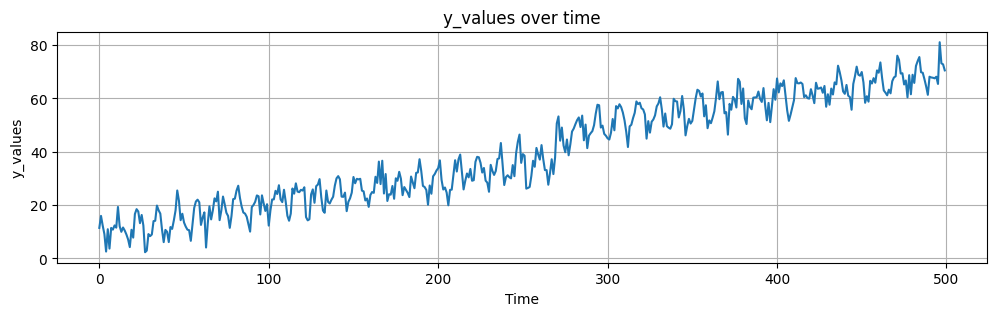

In [9]:
# Plot the data
plt.figure(figsize=(12, 3))
plt.plot(t, data, label="y_values")
plt.xlabel("Time")
plt.ylabel("y_values")
plt.title("y_values over time")
plt.grid()

We can now inspect the time series and identify the jump at $t=270$. We can also see that there is a clear trend and seasonality. We will now use the PSD to identify the frequency of the seasonality and the trend.

remember that to compute a PSD we need to make our time series stationary. In the cell below I have shown how not to do it. without stationarity, the PSD is not useful. 

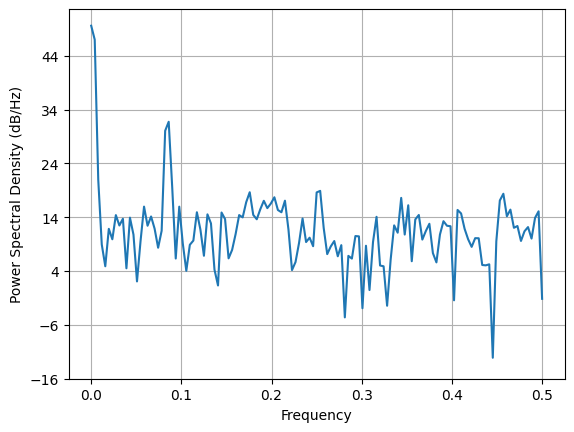

In [10]:
plt.psd(data, Fs=1);

Since we already now there is a linear trend and a jump we can remove them from the time series. We can do this by fitting a linear model to the time series and subtracting it. The resulting residuals will be stationary and we can compute the PSD.

Matrix A is defined as follows:

$$
A = \begin{bmatrix}
1 & t_1 & 0 \\
\vdots & \vdots & \vdots \\
1 & t_{269} & 0 \\
1 & t_{270} & 1 \\
1 & t_{271} & 1 \\
\vdots & \vdots & \vdots \\
1 & t_{500} & 1 \\
\end{bmatrix}
$$


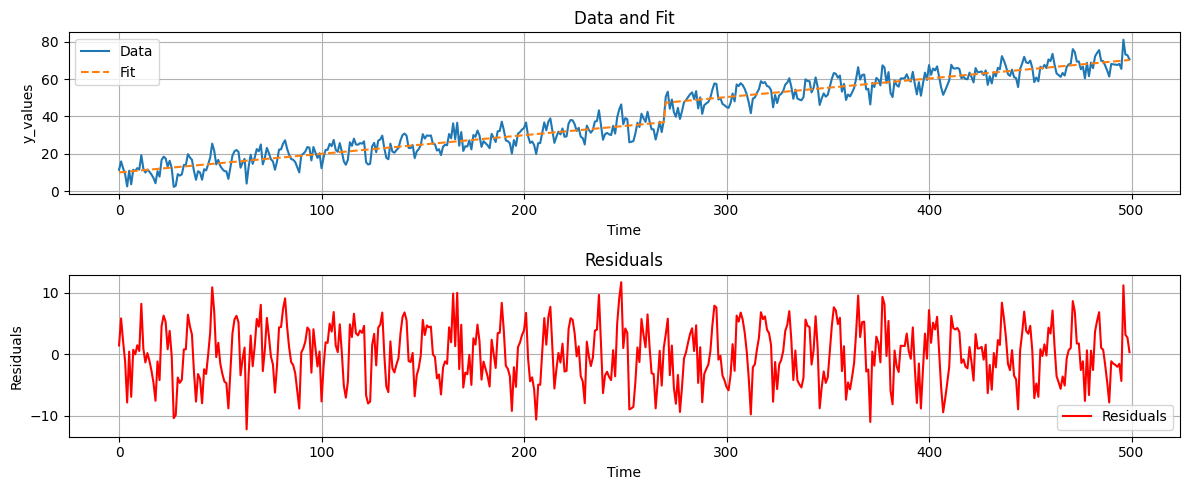

Frequency corresponding to the highest peak: 0.084


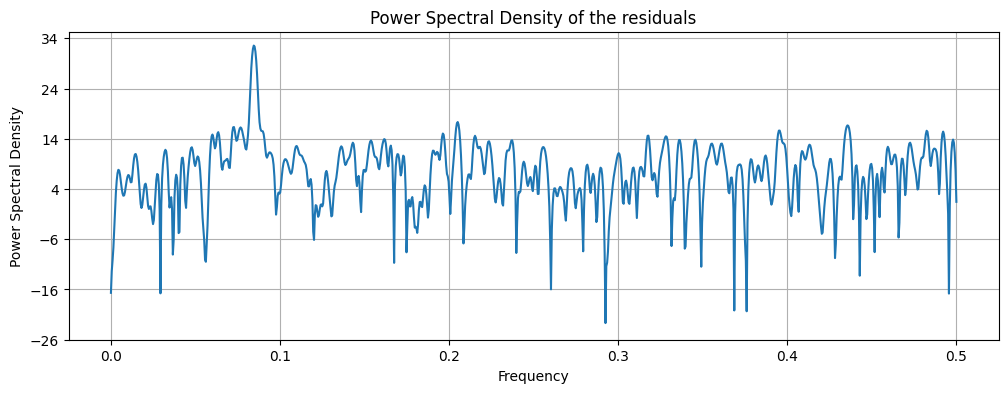

In [11]:
offset = np.zeros_like(data)
offset[270:] = 1

A = np.column_stack((np.ones_like(t), t, offset))
xhat = np.linalg.solve(A.T @ A, A.T @ data)
yhat = A @ xhat
ehat = data - yhat

fig, axs = plt.subplots(2, 1, figsize=(12, 5))

# Plot data and fit
axs[0].plot(t, data, label='Data')
axs[0].plot(t, yhat, label='Fit', linestyle='--')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('y_values')
axs[0].set_title('Data and Fit')
axs[0].legend()
axs[0].grid()

# Plot residuals
axs[1].plot(t, ehat, label='Residuals', color='red')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Residuals')
axs[1].set_title('Residuals')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()

# Create a sample signal
N = len(data)  # Number of points
T = 500/N  # Sampling interval (1000 Hz sampling rate)

plt.figure(figsize=(12, 4))
# in plt.psd we have added NFFT=1024 and pad_to=2048 to get a better resolution
pxx, freqs, line = plt.psd(ehat, return_line=True, Fs=1, NFFT=1024, pad_to=2048)

plt.xlabel("Frequency")
plt.ylabel("Power Spectral Density")
plt.title("Power Spectral Density of the residuals")
plt.grid(True)


# Find the frequency corresponding to the highest peak
highest_peak_freq = freqs[np.argmax(pxx)]
print("Frequency corresponding to the highest peak:", round(highest_peak_freq,3))



Using peak detection we can identify the frequency of the seasonality and the trend. 

Finally, we can use the identified frequencies to model the time series.

For this, we need to expand our matrix A to include the seasonality and the trend. The new matrix A is defined as follows:

$$
A = \begin{bmatrix}
1 & t_1 & 0 & \cos(2\pi t_1 f) & \sin(2\pi t_1 f) \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & t_{269} & 0  & \cos(2\pi t_{269} f) & \sin(2\pi t_{269} f) \\
1 & t_{270} & 1  & \cos(2\pi t_{270 f}) & \sin(2\pi t_{270} f) \\
1 & t_{271} & 1  & \cos(2\pi t_{271 f}) & \sin(2\pi t_{271} f) \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & t_{500} & 1  & \cos(2\pi t_{500 f}) & \sin(2\pi t_{500} f) \\
\end{bmatrix}
$$


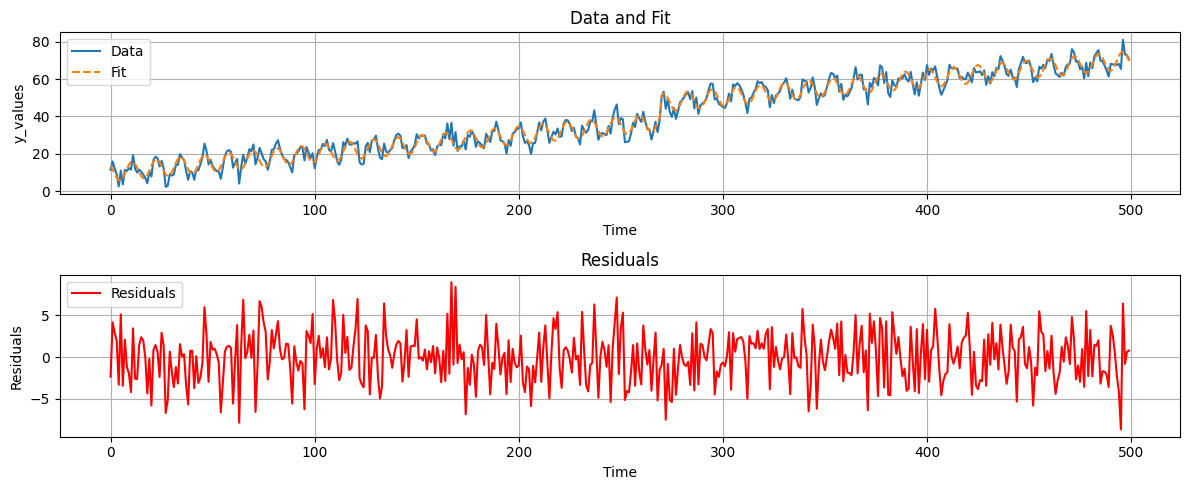

In [12]:
f = highest_peak_freq

A2 = np.column_stack((np.ones_like(t), t, offset, np.cos(2*np.pi*f*t), np.sin(2*np.pi*f*t)))

xhat2 = np.linalg.solve(A2.T @ A2, A2.T @ data)
yhat2 = A2 @ xhat2
ehat2 = data - yhat2 # removing the functional components from the data

fig, axs = plt.subplots(2, 1, figsize=(12, 5))

# Plot data and fit
axs[0].plot(t, data, label='Data')
axs[0].plot(t, yhat2, label='Fit', linestyle='--')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('y_values')
axs[0].set_title('Data and Fit')
axs[0].legend()
axs[0].grid()

# Plot residuals
axs[1].plot(t, ehat2, label='Residuals', color='red')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Residuals')
axs[1].set_title('Residuals')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()